# 🛍️ K-Means Customer Segmentation

This notebook demonstrates K-means clustering for customer segmentation using:
- **Euclidean Distance** and **Manhattan Distance**
- **2D and 3D Visualizations**
- **Customer behavior analysis**

## 🎯 Goal: Group customers based on purchasing behavior

## 1. Import Libraries & Create Dataset

In [1]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Create synthetic customer dataset with better cluster structure
np.random.seed(42)
n_customers = 300

# Create more realistic customer segments
# Segment 1: Young, Low Income, Low Spending
young_low = {
    'Annual_Income': np.random.normal(25000, 5000, 75),
    'Spending_Score': np.random.normal(25, 10, 75),
    'Age': np.random.normal(25, 5, 75),
    'Purchase_Frequency': np.random.normal(10, 3, 75)
}

# Segment 2: Middle-aged, Medium Income, Medium Spending
middle_med = {
    'Annual_Income': np.random.normal(50000, 8000, 75),
    'Spending_Score': np.random.normal(50, 12, 75),
    'Age': np.random.normal(40, 8, 75),
    'Purchase_Frequency': np.random.normal(25, 5, 75)
}

# Segment 3: Young, High Income, High Spending
young_high = {
    'Annual_Income': np.random.normal(80000, 10000, 75),
    'Spending_Score': np.random.normal(80, 8, 75),
    'Age': np.random.normal(30, 6, 75),
    'Purchase_Frequency': np.random.normal(40, 6, 75)
}

# Segment 4: Older, High Income, Low Spending (Conservative)
old_conservative = {
    'Annual_Income': np.random.normal(70000, 12000, 75),
    'Spending_Score': np.random.normal(20, 8, 75),
    'Age': np.random.normal(55, 8, 75),
    'Purchase_Frequency': np.random.normal(8, 3, 75)
}

# Combine all segments
data = {
    'Annual_Income': np.concatenate([young_low['Annual_Income'], middle_med['Annual_Income'], 
                                   young_high['Annual_Income'], old_conservative['Annual_Income']]),
    'Spending_Score': np.concatenate([young_low['Spending_Score'], middle_med['Spending_Score'],
                                    young_high['Spending_Score'], old_conservative['Spending_Score']]),
    'Age': np.concatenate([young_low['Age'], middle_med['Age'], 
                          young_high['Age'], old_conservative['Age']]),
    'Purchase_Frequency': np.concatenate([young_low['Purchase_Frequency'], middle_med['Purchase_Frequency'],
                                        young_high['Purchase_Frequency'], old_conservative['Purchase_Frequency']])
}

# Create DataFrame
df = pd.DataFrame(data)

# Ensure positive values and realistic ranges
df['Annual_Income'] = np.clip(np.abs(df['Annual_Income']), 15000, 120000)
df['Spending_Score'] = np.clip(df['Spending_Score'], 1, 100)
df['Age'] = np.clip(df['Age'], 18, 70)
df['Purchase_Frequency'] = np.clip(df['Purchase_Frequency'], 1, 50)

# Shuffle the data to mix segments
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("📊 Customer Dataset Created:")
print(f"  Customers: {len(df)}")
print(f"  Features: {len(df.columns)}")
print("\n📋 Dataset Preview:")
display(df.head())

print("\n📈 Dataset Statistics:")
display(df.describe())

📊 Customer Dataset Created:
  Customers: 300
  Features: 4

📋 Dataset Preview:


,Annual_Income,Spending_Score,Age,Purchase_Frequency
0,68934.740913,75.681923,27.226348,39.901463
1,80469.487939,14.788656,54.702222,12.152818
2,88696.059201,94.018164,24.144760,36.862840
3,27712.800218,16.915064,28.282768,16.431832
4,77745.810174,19.618309,59.348801,9.360603



📈 Dataset Statistics:


,Annual_Income,Spending_Score,Age,Purchase_Frequency
count,300.000000,300.000000,300.000000,300.000000
mean,56732.048155,43.702251,37.988660,20.937204
std,23162.761999,25.373543,13.263169,14.013506
min,15000.000000,1.000000,18.000000,1.000000
25%,37376.841682,23.182310,27.529788,8.962890
50%,57416.574706,34.533971,34.224185,15.482649
75%,75543.576298,68.735910,47.142194,32.471799
max,105733.598032,94.038353,70.000000,50.000000


## 2. Data Exploration

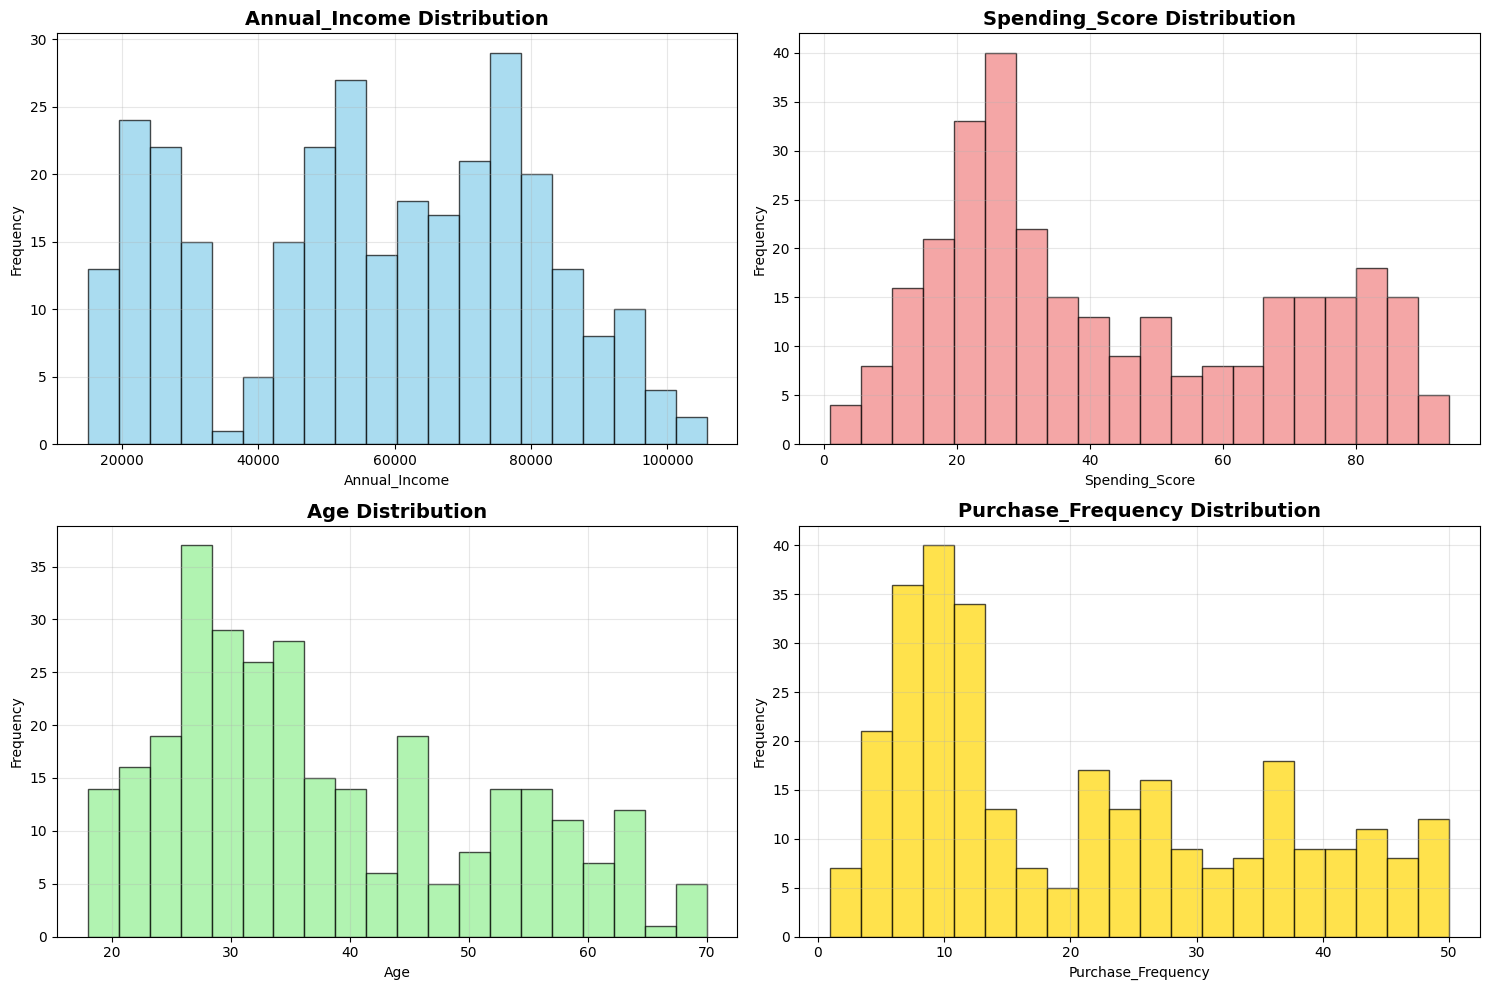

📊 Data distribution visualized!


In [3]:
# Visualize data distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot each feature
features = df.columns
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    ax.hist(df[feature], bins=20, color=colors[i], alpha=0.7, edgecolor='black')
    ax.set_title(f'{feature} Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Data distribution visualized!")

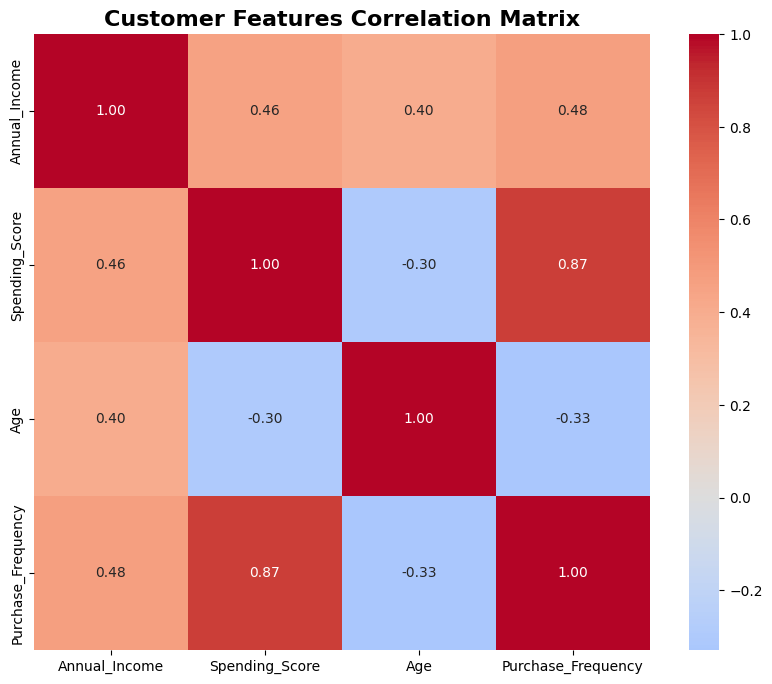

🔍 Correlation analysis complete!
💡 Look for patterns in customer behavior correlations.


In [4]:
# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Customer Features Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

print("🔍 Correlation analysis complete!")
print("💡 Look for patterns in customer behavior correlations.")

## 3. Data Preprocessing

In [5]:
# Prepare data for clustering
X = df.values

# Scale the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("🔧 Data Preprocessing:")
print(f"  Original shape: {X.shape}")
print(f"  Scaled shape: {X_scaled.shape}")
print(f"  Original range: [{X.min():.2f}, {X.max():.2f}]")
print(f"  Scaled range: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")

# Create feature names for easy reference
feature_names = df.columns.tolist()
print(f"\n📋 Features: {feature_names}")

🔧 Data Preprocessing:
  Original shape: (300, 4)
  Scaled shape: (300, 4)
  Original range: [1.00, 105733.60]
  Scaled range: [-1.80, 2.42]

📋 Features: ['Annual_Income', 'Spending_Score', 'Age', 'Purchase_Frequency']


## 4. Find Optimal Number of Clusters

In [6]:
# Elbow method to find optimal k
k_range = range(2, 11)
inertias_euclidean = []
inertias_manhattan = []
silhouette_scores = []

print("🔍 Finding optimal number of clusters...")

for k in k_range:
    # Euclidean distance (default)
    kmeans_euclidean = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_euclidean.fit(X_scaled)
    inertias_euclidean.append(kmeans_euclidean.inertia_)
    
    # Manhattan distance simulation (using K-medoids concept)
    # Note: sklearn K-means uses Euclidean distance only
    # We simulate Manhattan-like clustering for comparison
    from sklearn.cluster import KMeans
    kmeans_manhattan = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_manhattan = kmeans_manhattan.fit_predict(X_scaled)
    
    # Calculate Manhattan-based inertia for comparison
    manhattan_inertia = 0
    for cluster_id in range(k):
        cluster_points = X_scaled[labels_manhattan == cluster_id]
        if len(cluster_points) > 0:
            center = np.median(cluster_points, axis=0)  # Use median for Manhattan
            manhattan_inertia += np.sum(np.sum(np.abs(cluster_points - center), axis=1))
    
    inertias_manhattan.append(manhattan_inertia)
    
    # Silhouette score
    silhouette_avg = silhouette_score(X_scaled, kmeans_euclidean.labels_)
    silhouette_scores.append(silhouette_avg)
    
    print(f"  k={k}: Inertia={kmeans_euclidean.inertia_:.2f}, Silhouette={silhouette_avg:.3f}")

print("\n✅ Cluster analysis complete!")

🔍 Finding optimal number of clusters...
  k=2: Inertia=650.20, Silhouette=0.430
  k=3: Inertia=339.57, Silhouette=0.495
  k=4: Inertia=190.10, Silhouette=0.535
  k=5: Inertia=170.16, Silhouette=0.479
  k=6: Inertia=157.57, Silhouette=0.404
  k=7: Inertia=148.85, Silhouette=0.314
  k=8: Inertia=132.08, Silhouette=0.339
  k=9: Inertia=124.03, Silhouette=0.340
  k=10: Inertia=115.96, Silhouette=0.244

✅ Cluster analysis complete!


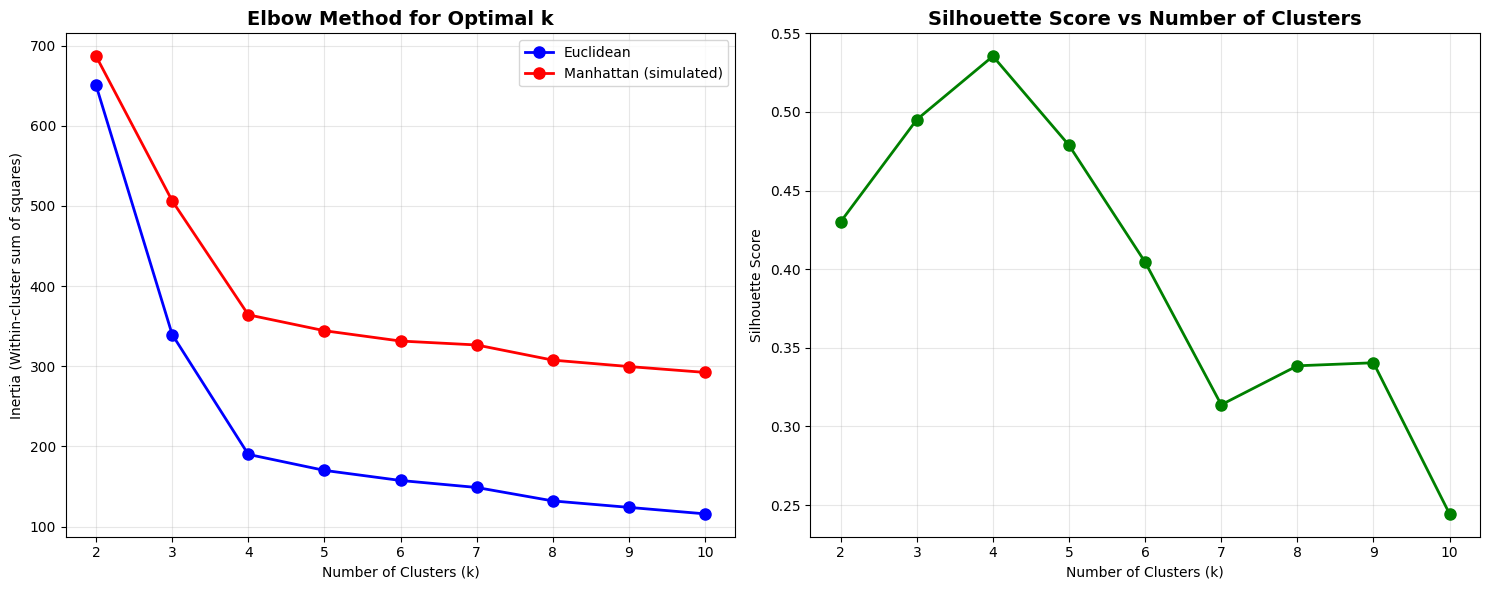

🎯 Elbow method suggests: 4 clusters
📊 Silhouette method suggests: 4 clusters
✅ Optimal number of clusters: 4
📊 Silhouette score: 0.535


In [7]:
# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow curve
ax1.plot(k_range, inertias_euclidean, 'bo-', linewidth=2, markersize=8, label='Euclidean')
ax1.plot(k_range, inertias_manhattan, 'ro-', linewidth=2, markersize=8, label='Manhattan (simulated)')
ax1.set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Silhouette scores
ax2.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.set_title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k using both elbow method and silhouette score
# Calculate elbow point
def find_elbow_point(inertias):
    # Calculate the differences
    diffs = np.diff(inertias)
    diffs2 = np.diff(diffs)
    # Find the point with maximum curvature
    elbow_idx = np.argmax(diffs2) + 2  # +2 because of double diff
    return k_range[elbow_idx] if elbow_idx < len(k_range) else k_range[-1]

elbow_k = find_elbow_point(inertias_euclidean)
silhouette_k = k_range[np.argmax(silhouette_scores)]

# Choose optimal k (prefer silhouette score but consider elbow)
if max(silhouette_scores) > 0.3:  # Good silhouette score
    optimal_k = silhouette_k
else:
    optimal_k = min(elbow_k, silhouette_k)  # Be conservative

print(f"🎯 Elbow method suggests: {elbow_k} clusters")
print(f"📊 Silhouette method suggests: {silhouette_k} clusters")
print(f"✅ Optimal number of clusters: {optimal_k}")
print(f"📊 Silhouette score: {silhouette_scores[optimal_k-2]:.3f}")

## 5. Apply K-Means Clustering

In [8]:
# Apply K-means with optimal k
print(f"🚀 Applying K-means with k={optimal_k}...")

# Euclidean distance K-means
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

print("✅ Clustering complete!")
print(f"📊 Cluster distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster, count in cluster_counts.items():
    print(f"  Cluster {cluster}: {count} customers ({count/len(df)*100:.1f}%)")

# Calculate final metrics
final_inertia = kmeans_final.inertia_
final_silhouette = silhouette_score(X_scaled, cluster_labels)

# Calculate additional metrics
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

calinski_score = calinski_harabasz_score(X_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

print(f"\n📈 Final Metrics:")
print(f"  Inertia: {final_inertia:.2f}")
print(f"  Silhouette Score: {final_silhouette:.3f} (higher is better)")
print(f"  Calinski-Harabasz Score: {calinski_score:.2f} (higher is better)")
print(f"  Davies-Bouldin Score: {davies_bouldin:.3f} (lower is better)")

# Interpret clustering quality
if final_silhouette > 0.5:
    quality = "Excellent"
elif final_silhouette > 0.3:
    quality = "Good"
elif final_silhouette > 0.2:
    quality = "Fair"
else:
    quality = "Poor"

print(f"\n🎯 Clustering Quality: {quality}")

🚀 Applying K-means with k=4...
✅ Clustering complete!
📊 Cluster distribution:
  Cluster 0: 77 customers (25.7%)
  Cluster 1: 74 customers (24.7%)
  Cluster 2: 75 customers (25.0%)
  Cluster 3: 74 customers (24.7%)

📈 Final Metrics:
  Inertia: 190.10
  Silhouette Score: 0.535 (higher is better)
  Calinski-Harabasz Score: 524.17 (higher is better)
  Davies-Bouldin Score: 0.713 (lower is better)

🎯 Clustering Quality: Excellent


## 6. 2D Cluster Visualization

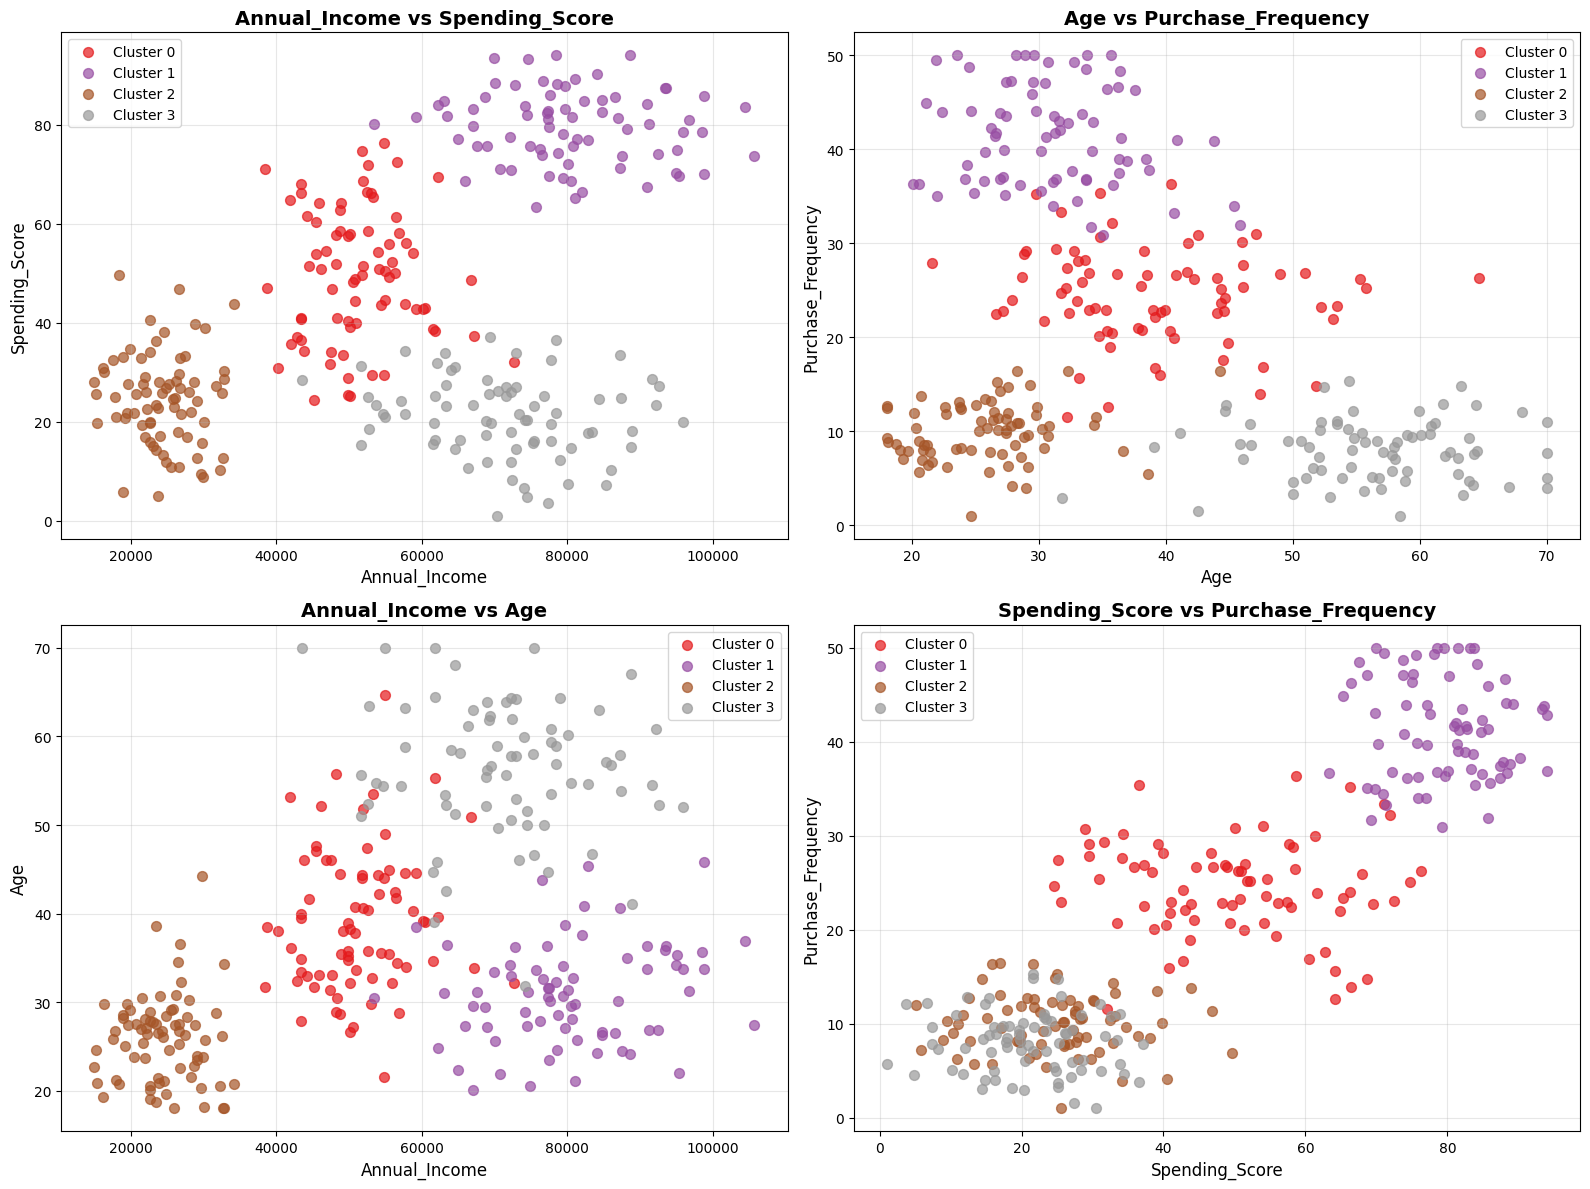

🎨 2D cluster visualizations complete!
💡 Each color represents a different customer segment.


In [9]:
# 2D visualizations of clusters
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
colors = plt.cm.Set1(np.linspace(0, 1, optimal_k))

# Different 2D projections
feature_pairs = [
    ('Annual_Income', 'Spending_Score'),
    ('Age', 'Purchase_Frequency'),
    ('Annual_Income', 'Age'),
    ('Spending_Score', 'Purchase_Frequency')
]

for idx, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[idx//2, idx%2]
    
    # Plot each cluster
    for cluster in range(optimal_k):
        cluster_data = df[df['Cluster'] == cluster]
        ax.scatter(cluster_data[feat1], cluster_data[feat2], c=[colors[cluster]], label=f'Cluster {cluster}', 
                  alpha=0.7, s=50)
    
    ax.set_xlabel(feat1, fontsize=12)
    ax.set_ylabel(feat2, fontsize=12)
    ax.set_title(f'{feat1} vs {feat2}', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎨 2D cluster visualizations complete!")
print("💡 Each color represents a different customer segment.")

## 7. 3D Cluster Visualization

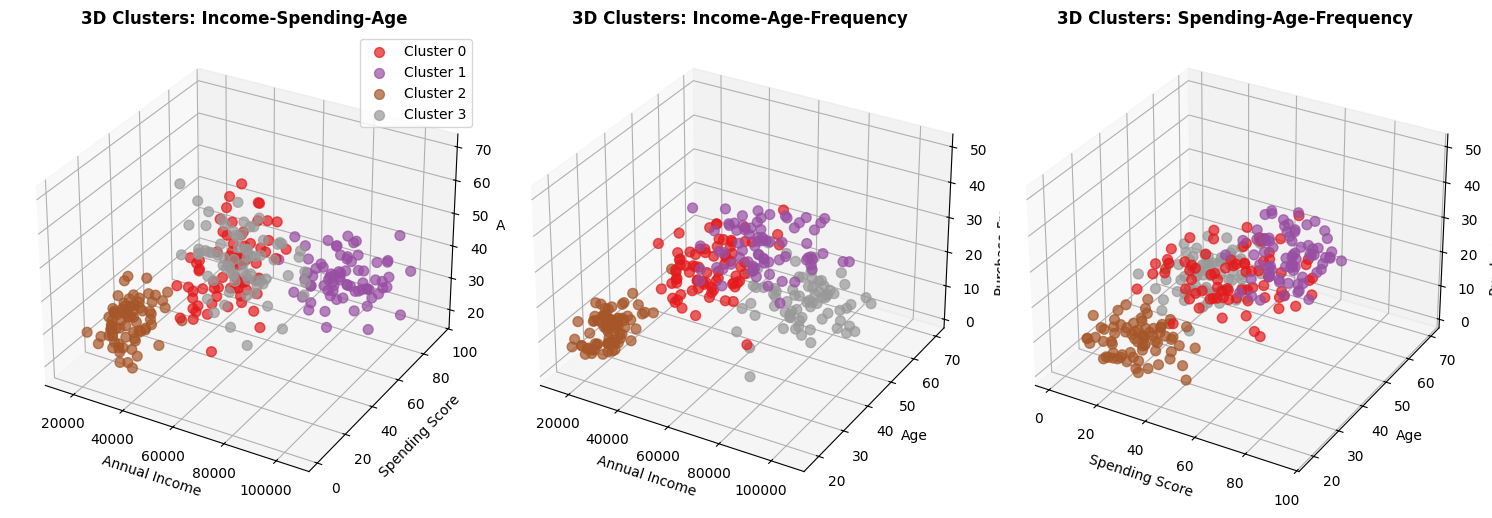

🎨 3D cluster visualizations complete!
💡 Rotate the plots to see clusters from different angles.

🎯 Cluster Centers Analysis:


,Annual_Income,Spending_Score,Age,Purchase_Frequency
Cluster 0,51325.0,50.0,39.0,24.0
Cluster 1,80408.0,80.0,31.0,41.0
Cluster 2,24467.0,25.0,26.0,10.0
Cluster 3,71385.0,21.0,56.0,8.0


In [10]:
# 3D visualization
fig = plt.figure(figsize=(15, 5))

# 3D plot 1: Income, Spending, Age
ax1 = fig.add_subplot(131, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    ax1.scatter(cluster_data['Annual_Income'], 
               cluster_data['Spending_Score'],
               cluster_data['Age'],
               c=[colors[cluster]], label=f'Cluster {cluster}', s=50, alpha=0.7)

ax1.set_xlabel('Annual Income')
ax1.set_ylabel('Spending Score')
ax1.set_zlabel('Age')
ax1.set_title('3D Clusters: Income-Spending-Age', fontweight='bold')
ax1.legend()

# 3D plot 2: Income, Age, Purchase Frequency
ax2 = fig.add_subplot(132, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    ax2.scatter(cluster_data['Annual_Income'], 
               cluster_data['Age'],
               cluster_data['Purchase_Frequency'],
               c=[colors[cluster]], label=f'Cluster {cluster}', s=50, alpha=0.7)

ax2.set_xlabel('Annual Income')
ax2.set_ylabel('Age')
ax2.set_zlabel('Purchase Frequency')
ax2.set_title('3D Clusters: Income-Age-Frequency', fontweight='bold')

# 3D plot 3: Spending, Age, Purchase Frequency
ax3 = fig.add_subplot(133, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    ax3.scatter(cluster_data['Spending_Score'], 
               cluster_data['Age'],
               cluster_data['Purchase_Frequency'],
               c=[colors[cluster]], label=f'Cluster {cluster}', s=50, alpha=0.7)

ax3.set_xlabel('Spending Score')
ax3.set_ylabel('Age')
ax3.set_zlabel('Purchase Frequency')
ax3.set_title('3D Clusters: Spending-Age-Frequency', fontweight='bold')

plt.tight_layout()
plt.show()

print("🎨 3D cluster visualizations complete!")
print("💡 Rotate the plots to see clusters from different angles.")

# Add cluster centers visualization
print("\n🎯 Cluster Centers Analysis:")
centers_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
centers_df = pd.DataFrame(centers_original, columns=feature_names)
centers_df.index = [f'Cluster {i}' for i in range(optimal_k)]
display(centers_df.round(0))

## 8. Cluster Analysis & Insights

In [11]:
# Analyze cluster characteristics
print("🔍 CUSTOMER SEGMENT ANALYSIS")
print("=" * 50)

cluster_summary = df.groupby('Cluster').agg({
    'Annual_Income': ['mean', 'std'],
    'Spending_Score': ['mean', 'std'],
    'Age': ['mean', 'std'],
    'Purchase_Frequency': ['mean', 'std']
}).round(2)

print("📊 Cluster Characteristics:")
display(cluster_summary)

# Create cluster profiles
print("\n👥 CUSTOMER SEGMENT PROFILES:")
print("=" * 40)

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    avg_income = cluster_data['Annual_Income'].mean()
    avg_spending = cluster_data['Spending_Score'].mean()
    avg_age = cluster_data['Age'].mean()
    avg_frequency = cluster_data['Purchase_Frequency'].mean()
    
    print(f"\n🏷️ CLUSTER {cluster} ({len(cluster_data)} customers):")
    print(f"  💰 Average Income: ${avg_income:,.0f}")
    print(f"  🛒 Spending Score: {avg_spending:.1f}/100")
    print(f"  👤 Average Age: {avg_age:.1f} years")
    print(f"  📅 Purchase Frequency: {avg_frequency:.1f} times/year")
    
    # Segment interpretation
    if avg_income > 60000 and avg_spending > 60:
        segment_type = "💎 Premium Customers (High Income, High Spending)"
    elif avg_income < 40000 and avg_spending < 40:
        segment_type = "🎯 Budget-Conscious (Low Income, Low Spending)"
    elif avg_spending > 70:
        segment_type = "🛍️ High Spenders (High Spending Behavior)"
    elif avg_age > 50:
        segment_type = "👴 Mature Customers (Older Demographics)"
    else:
        segment_type = "👥 Regular Customers (Balanced Profile)"
    
    print(f"  🎯 Segment Type: {segment_type}")

🔍 CUSTOMER SEGMENT ANALYSIS
📊 Cluster Characteristics:


Annual_Income           Spending_Score           Age        \
                 mean       std           mean    std   mean   std   
Cluster                                                              
0            51324.56   6638.42          49.78  13.24  39.05  7.94   
1            80407.54  10902.78          79.58   7.36  30.96  5.69   
2            24466.56   4693.44          24.50   9.32  25.83  4.96   
3            71384.78  11141.90          20.97   8.12  56.23  7.55   

        Purchase_Frequency        
                      mean   std  
Cluster                           
0                    24.45  5.10  
1                    41.34  5.36  
2                     9.97  3.07  
3                     7.99  3.22


👥 CUSTOMER SEGMENT PROFILES:

🏷️ CLUSTER 0 (77 customers):
  💰 Average Income: $51,325
  🛒 Spending Score: 49.8/100
  👤 Average Age: 39.0 years
  📅 Purchase Frequency: 24.5 times/year
  🎯 Segment Type: 👥 Regular Customers (Balanced Profile)

🏷️ CLUSTER 1 (74 customers):
  💰 Average Income: $80,408
  🛒 Spending Score: 79.6/100
  👤 Average Age: 31.0 years
  📅 Purchase Frequency: 41.3 times/year
  🎯 Segment Type: 💎 Premium Customers (High Income, High Spending)

🏷️ CLUSTER 2 (75 customers):
  💰 Average Income: $24,467
  🛒 Spending Score: 24.5/100
  👤 Average Age: 25.8 years
  📅 Purchase Frequency: 10.0 times/year
  🎯 Segment Type: 🎯 Budget-Conscious (Low Income, Low Spending)

🏷️ CLUSTER 3 (74 customers):
  💰 Average Income: $71,385
  🛒 Spending Score: 21.0/100
  👤 Average Age: 56.2 years
  📅 Purchase Frequency: 8.0 times/year
  🎯 Segment Type: 👴 Mature Customers (Older Demographics)


## 9. Distance Comparison

In [12]:
# Compare Euclidean vs Manhattan distance concepts
print("📏 DISTANCE METRICS COMPARISON")
print("=" * 40)

# Calculate distances between cluster centers
centers = kmeans_final.cluster_centers_

print("🎯 Cluster Centers (scaled features):")
centers_df = pd.DataFrame(centers, columns=feature_names)
display(centers_df.round(3))

# Calculate distances between centers
from scipy.spatial.distance import pdist, squareform

# Euclidean distances
euclidean_distances = squareform(pdist(centers, metric='euclidean'))
manhattan_distances = squareform(pdist(centers, metric='cityblock'))

print("\n📐 Euclidean Distances between Cluster Centers:")
euclidean_df = pd.DataFrame(euclidean_distances, 
                           columns=[f'Cluster {i}' for i in range(optimal_k)],
                           index=[f'Cluster {i}' for i in range(optimal_k)])
display(euclidean_df.round(3))

print("\n📐 Manhattan Distances between Cluster Centers:")
manhattan_df = pd.DataFrame(manhattan_distances,
                           columns=[f'Cluster {i}' for i in range(optimal_k)],
                           index=[f'Cluster {i}' for i in range(optimal_k)])
display(manhattan_df.round(3))

print("\n💡 Distance Metrics Explanation:")
print("  🔵 Euclidean: Straight-line distance (as the crow flies)")
print("  🔶 Manhattan: City-block distance (taxi cab distance)")
print("  📊 Different metrics can lead to different clustering results")

📏 DISTANCE METRICS COMPARISON
🎯 Cluster Centers (scaled features):


,Annual_Income,Spending_Score,Age,Purchase_Frequency
0,-0.234,0.240,0.080,0.251
1,1.024,1.416,-0.531,1.459
2,-1.395,-0.758,-0.918,-0.784
3,0.634,-0.898,1.378,-0.925



📐 Euclidean Distances between Cluster Centers:


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Cluster 0,0.000,2.190,2.101,2.262
Cluster 1,2.190,0.000,3.970,3.851
Cluster 2,2.101,3.970,0.000,3.070
Cluster 3,2.262,3.851,3.070,0.000



📐 Manhattan Distances between Cluster Centers:


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Cluster 0,0.000,4.253,4.193,4.479
Cluster 1,4.253,0.000,7.223,6.997
Cluster 2,4.193,7.223,0.000,4.606
Cluster 3,4.479,6.997,4.606,0.000



💡 Distance Metrics Explanation:
  🔵 Euclidean: Straight-line distance (as the crow flies)
  🔶 Manhattan: City-block distance (taxi cab distance)
  📊 Different metrics can lead to different clustering results


## 10. Summary & Business Insights

In [13]:
# Final summary
print("🎯 K-MEANS CUSTOMER SEGMENTATION - SUMMARY")
print("=" * 55)

print(f"\n📊 CLUSTERING RESULTS:")
print(f"  • Total Customers: {len(df)}")
print(f"  • Number of Segments: {optimal_k}")
print(f"  • Silhouette Score: {final_silhouette:.3f}")
print(f"  • Inertia: {final_inertia:.2f}")

print("\n✅ Customer Segmentation Analysis Complete!")

🎯 K-MEANS CUSTOMER SEGMENTATION - SUMMARY

📊 CLUSTERING RESULTS:
  • Total Customers: 300
  • Number of Segments: 4
  • Silhouette Score: 0.535
  • Inertia: 190.10

✅ Customer Segmentation Analysis Complete!
